Plotting

In [2]:
# Mount Drive 
from google.colab import drive

drive.mount('/content/gdrive')


#Change to the correct directory
import os
os.chdir('/content/gdrive/My Drive/junior/442')

!ls
!pwd


#Make imports
import torch
from PIL import Image
import os
import numpy as np
import PIL
import copy
import matplotlib.pyplot as plt


# Detect if we have a GPU available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
if torch.cuda.is_available():
    print("Using the GPU!")
else:
    print("WARNING: Could not find GPU! Using CPU only. If you want to enable GPU, please to go Edit > Notebook Settings > Hardware Accelerator and select GPU.")


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
'Colab Notebooks'   models   png   png224   png224output
/content/gdrive/My Drive/junior/442
Using the GPU!


In [8]:
model_types_to_train = ["alexnet", "vgg", "squeezenet", "densenet", "resnet"]

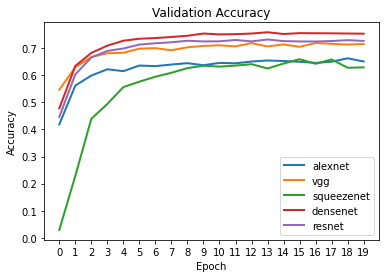

In [11]:
#test plot
epochs = 20
x = np.arange(epochs)



plt.figure()
for model in model_types_to_train:
  hist = torch.load('models/pretrained_224Hist_{}.pth'.format(model))
  plt.plot(x, hist, label='%s' % model, linewidth=2)


plt.xticks(x)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy')
plt.savefig("ValidationAccuracy.png")
plt.legend()
plt.show()


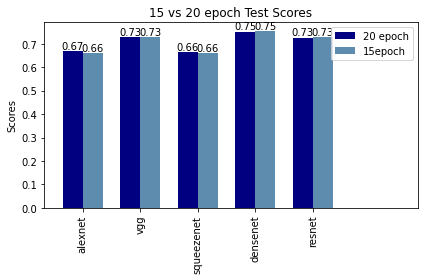

In [19]:
N = 5

top1_20 = (0.6685, 0.727, 0.664, 0.7515, 0.72625)

ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, top1_20, width, color='#000080')

top1_15= (0.66125, 0.72875, 0.6585, 0.75325, 0.72875)
rects2 = ax.bar(ind + width,top1_15, width, color='#5D8CAE')

# add some text for labels, title and axes ticks
ax.set_ylabel('Scores')
ax.set_title('15 vs 20 epoch Test Scores')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels((('alexnet', 'vgg', 'squeezenet', 'densenet', 'resnet') ), rotation='vertical')   
ax.set_xlim(-.5, N + 1)
ax.legend((rects1[0], rects2[0]), ('20 epoch', '15epoch'), loc="upper right")


def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.0*height,
                '%0.2f' % (height),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.tight_layout()
plt.savefig('15vs20Top1TestScores' ) 
plt.show()

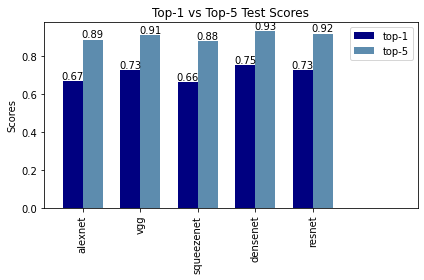

In [21]:
N = 5

top1_20 = (0.6685, 0.727, 0.664, 0.7515, 0.72625)

ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, top1_20, width, color='#000080')

top5_20= (0.886, 0.9105, 0.8765, 0.92975, 0.91725)
rects2 = ax.bar(ind + width,top5_20, width, color='#5D8CAE')

# add some text for labels, title and axes ticks
ax.set_ylabel('Scores')
ax.set_title('Top-1 vs Top-5 Test Scores')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels((('alexnet', 'vgg', 'squeezenet', 'densenet', 'resnet') ), rotation='vertical')   
ax.set_xlim(-.5, N + 1)
ax.legend((rects1[0], rects2[0]), ('top-1', 'top-5'), loc="upper right")



autolabel(rects1)
autolabel(rects2)

plt.tight_layout()
plt.savefig('Top1vsTop5TestScores' ) 
plt.show()


In [ ]:

alexnet     top1:0.6685  top5:0.886
vgg         top1:0.727   top5:0.9105
squeezenet  top1:0.664   top5:0.8765
densenet    top1:0.7515  top5:0.92975
resnet      top1:0.72625 top5:0.91725

15 epoch models
alexnet     top1:0.66125 top5:0.874
vgg         top1:0.72875 top5:0.92075
squeezenet  top1:0.6585  top5:0.87
densenet    top1:0.75325 top5:0.93
resnet      top1:0.72875 top5:0.92075
